#### Load and Inspect Data

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Reviews.csv")

# Show first few rows
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
# Check the dataset info
df.info()
df.describe()
df.isnull().sum() # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

#### Clean and Structure the Data

In [4]:
# Keep only the columns that are needed
df = df[['Text', 'Score', 'Time', 'ProductId']]

# Drop missing values
df.dropna(inplace=True)

# Convert Unix timestamp to a readable date
df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Remove duplicate reviews
df = df.drop_duplicates()

# Display cleaned dataset
df.head()

,Text,Score,Time,ProductId
0,I have bought several of the Vitality canned d...,5,2011-04-27,B001E4KFG0
1,Product arrived labeled as Jumbo Salted Peanut...,1,2012-09-07,B00813GRG4
2,This is a confection that has been around a fe...,4,2008-08-18,B000LQOCH0
3,If you are looking for the secret ingredient i...,2,2011-06-13,B000UA0QIQ
4,Great taffy at a great price. There was a wid...,5,2012-10-21,B006K2ZZ7K


#### Store Data in a SQL Database

In [5]:
import sqlite3

# Connect to SQLite
conn = sqlite3.connect("reviews.db")
cursor = conn.cursor()

# Save DataFrame to SQL table
df.to_sql("reviews", conn, if_exists="replace", index=False)

# Check stored data
pd.read_sql("SELECT * FROM reviews LIMIT 5", conn)

,Text,Score,Time,ProductId
0,I have bought several of the Vitality canned d...,5,2011-04-27 00:00:00,B001E4KFG0
1,Product arrived labeled as Jumbo Salted Peanut...,1,2012-09-07 00:00:00,B00813GRG4
2,This is a confection that has been around a fe...,4,2008-08-18 00:00:00,B000LQOCH0
3,If you are looking for the secret ingredient i...,2,2011-06-13 00:00:00,B000UA0QIQ
4,Great taffy at a great price. There was a wid...,5,2012-10-21 00:00:00,B006K2ZZ7K


#### Perform Sentiment Analysis

In [6]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df['Sentiment'] = df['Text'].apply(get_sentiment)

# Check results
df[['Text', 'Score', 'Sentiment']].head()

,Text,Score,Sentiment
0,I have bought several of the Vitality canned d...,5,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,1,Negative
2,This is a confection that has been around a fe...,4,Positive
3,If you are looking for the secret ingredient i...,2,Positive
4,Great taffy at a great price. There was a wid...,5,Positive


/var/folders/nl/t3fp_7vx57bcv4f1x7pv33wm0000gn/T/ipykernel_26635/1371218884.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


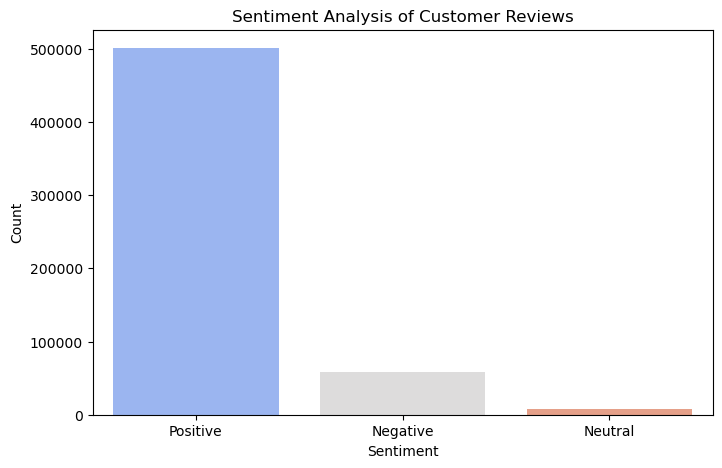

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count sentiment categories
sentiment_counts = df['Sentiment'].value_counts()

# Plot results
plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.title("Sentiment Analysis of Customer Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

### Insights:
- Most reviews are positive, suggesting general customer satisfaction.

- Negative reviews are significantly fewer but crucial for improvement insights. 

### Further Analysis: Score vs. Time and Its Effect on Sentiment

##### Aggregate Data by Month/Year

In [ ]:
# Convert Time column to datetime format (if not already done)
df['Time'] = pd.to_datetime(df['Time'])

# Extract Year-Month for analysis
df['YearMonth'] = df['Time'].dt.to_period('M')

# Group by time and compute average score
score_trend = df.groupby('YearMonth')['Score'].mean().reset_index()

# Display the first few rows
print(score_trend.head())

  YearMonth  Score
0   1999-10    5.0
1   1999-12    5.0
2   2000-01    3.5
3   2000-02    4.0
4   2000-06    5.0


##### Visualizing Score Trends Over Time

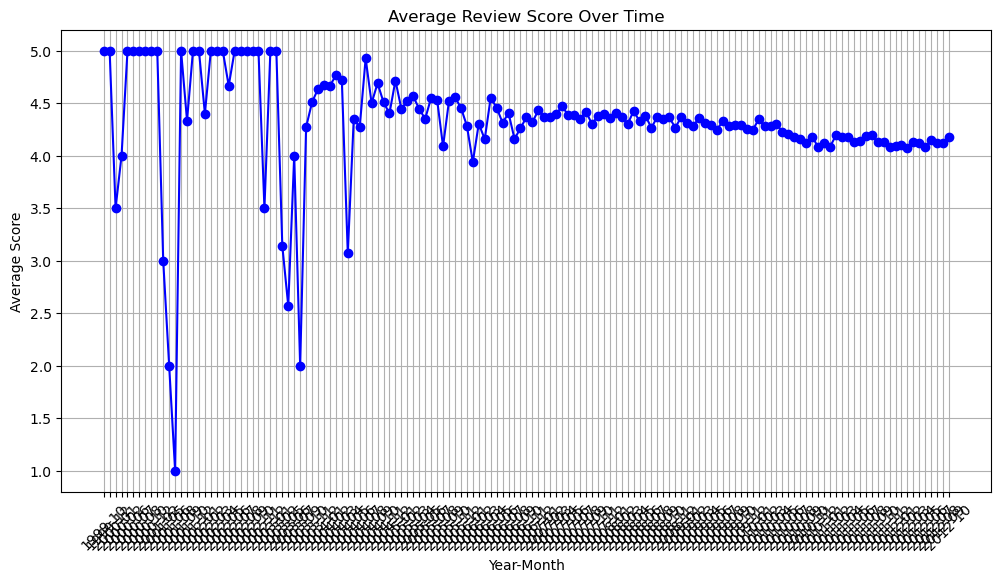

In [9]:
import matplotlib.pyplot as plt

# Plot average review score over time
plt.figure(figsize=(12,6))
plt.plot(score_trend['YearMonth'].astype(str), score_trend['Score'], marker='o', linestyle='-', color='blue')

# Customize plot
plt.title("Average Review Score Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Insights:

- Identifies periods of declining or improving customer satisfaction.

- Correlate dips with potential product changes, seasonal trends, or external factors.

##### Comparing Sentiment Distribution Over Time

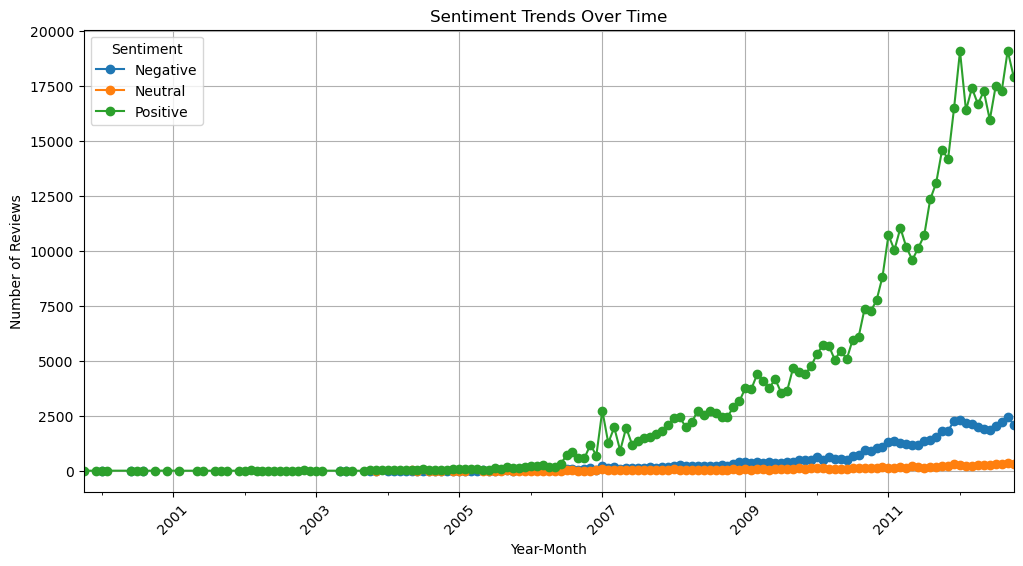

In [10]:
import seaborn as sns

# Group data by time and sentiment count
sentiment_trend = df.groupby(['YearMonth', 'Sentiment']).size().unstack()

# Plot sentiment distribution over time
sentiment_trend.plot(kind='line', figsize=(12,6), marker='o')

plt.title("Sentiment Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.grid()
plt.show()

### Insights:
- Spikes in negative reviews may indicate product defects or controversies.

- Observing positive trends can highlight successful product improvements or marketing strategies.

##### Find Correlation Between Score & Negative Sentiment

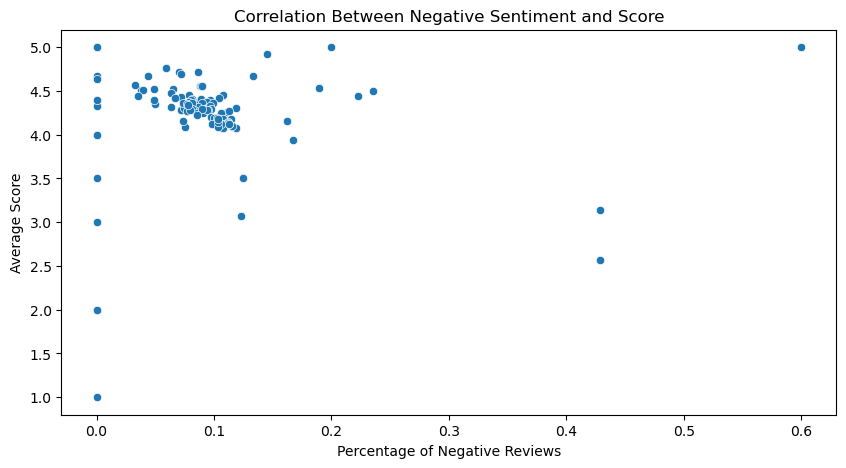

In [11]:
# Calculate the percentage of negative reviews per time period
df['Negative'] = df['Sentiment'].apply(lambda x: 1 if x == "Negative" else 0)
neg_trend = df.groupby('YearMonth')['Negative'].mean().reset_index()

# Merge with score trend
merged = pd.merge(score_trend, neg_trend, on="YearMonth")

# Plot correlation between negative sentiment and score
plt.figure(figsize=(10,5))
sns.scatterplot(x=merged['Negative'], y=merged['Score'])
plt.title("Correlation Between Negative Sentiment and Score")
plt.xlabel("Percentage of Negative Reviews")
plt.ylabel("Average Score")
plt.show()

### Insights:
- A high percentage of negative reviews correlates with a drop in average score.

- Brands can use this insight to proactively address customer concerns.